# Python Session #3: Data Summary / Satistics - Homework Assignment


## Lecture Structure:

1. Measure of central tendency

- Mean
- Median
- Mode

2. Measure of spread

- Range
- Standard Deviation
- Variance

3. Correlation coeffcient

## We will use:
- `statistics.mean()`,
`statistics.median()`,
`statistics.mean()`,
`groupby.mean()`,
`groupby.median()`,
`gmean()`,
`statistics.stdev()`,
`statistics.variance()`,
`corr()`,
`numpy.corrcoef()`

In [ ]:
### Importing libraries and packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Reading data

cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")  # cars dataset
olist = pd.read_csv("https://raw.githubusercontent.com/Kartthik-Rathinakumar/ReDI/main/Olist.csv")  # Olist - new dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")


## **Question #1 : Rentals dataset**

For the rentals dataset, identify:

1. Dependent variable

2. Indpendent variable(s)

3. Statistically prove their relation, use the help of visual diagram whenever necessary.

In [ ]:
### Answer #1.1
rentals[['Rent']]



,Rent
0,2659.00
1,1200.00
2,979.00
3,1830.22
4,2272.00
...,...
759,959.00
760,649.00
761,2750.00
762,1259.00


In [ ]:
### Answer #1.2
rentals[['Region', 'Condition', 'Rooms', 'Year_Construction', 'Space']]


,Region,Condition,Rooms,Year_Construction,Space
0,Mitte,first_time_use,4.0,2019,117.20
1,Kreuzberg,first_time_use,1.0,2020,29.33
2,Köpenick,well_kept,2.0,1997,83.61
3,Wilmersdorf,well_kept,4.0,1900,171.18
4,Kreuzberg,first_time_use,2.0,2020,88.27
...,...,...,...,...,...
759,Wedding,mint_condition,1.0,2017,27.80
760,Wedding,mint_condition,1.0,2017,20.50
761,Wilmersdorf,mint_condition,4.0,2017,110.00
762,Köpenick,well_kept,2.0,2017,91.20


In [ ]:
### Answer #1.3
rentals.corr()

<ipython-input-18-369dcdf7733f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rentals.corr()


,Rooms,Rent,Year_Construction,Space
Rooms,1.000000,0.628816,-0.009086,0.793338
Rent,0.628816,1.000000,0.078858,0.855683
Year_Construction,-0.009086,0.078858,1.000000,-0.082940
Space,0.793338,0.855683,-0.082940,1.000000


<ipython-input-25-adcd16de836e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rentals.corr(),


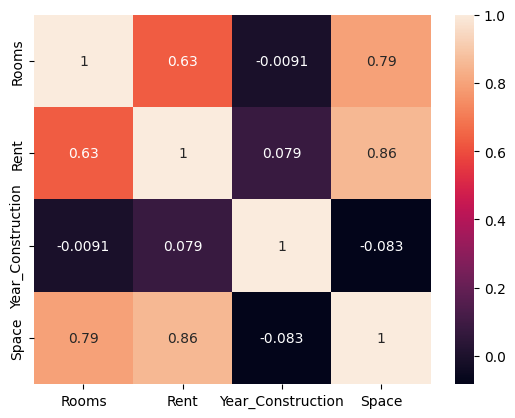

In [ ]:
sns.heatmap(rentals.corr(),
            xticklabels=True,
            yticklabels=True,
            annot=True);

## **Question #2 : rentals dataset**

Identify the best region to live, based on:

1. Average Price

2. Average Rooms Available

3. Average Space

4. What type of apartment condition is mostly available in Mitte, Kruezberg and Wilmersforf respectively?

In [ ]:
### Identify the best region to live, based on: Average Price
best_region_price = rentals.groupby('Region')[['Rent']].mean().sort_values('Rent')[:1].round(2)
best_region_price


,Rent
Region,
Wedding,847.14


In [ ]:
### Identify the best region to live, based on: Average Rooms Available
best_region_rooms = rentals.groupby('Region')[['Rooms']].mean().sort_values('Rooms')[:1].round(2)
best_region_rooms


,Rooms
Region,
Wedding,1.73


In [ ]:
### Identify the best region to live, based on: Average Space
best_region_space = rentals.groupby('Region')[['Space']].mean().sort_values('Space')[:1].round(2)
best_region_space


,Space
Region,
Wedding,46.93


In [ ]:
### What type of apartment condition is mostly available in Mitte, Kruezberg and Wedding respectively?
regions_M_K_W = rentals.query('Region == "Mitte"')
# | Region == "Kruezberg" | Region == "Wedding"')

In [ ]:
regions_M_K_W['Count'] = 1

<ipython-input-24-2027366f6ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_M_K_W['Count'] = 1


In [ ]:
regions_M_K_W.groupby("Region")

In [ ]:
regions_M_K_W.groupby(["Region", "Condition"])[['Count']].count().sort_values(['Region', 'Count'], ascending=False)




Count
Region Condition                                
Mitte  mint_condition                         49
       first_time_use                         43
       no_information                         29
       refurbished                            15
       first_time_use_after_refurbishment      7
       well_kept                               6
       fully_renovated                         3
       modernized                              1

In [ ]:
### What type of apartment condition is mostly available in Mitte, Kruezberg and Wedding respectively?

Mitte = rentals.query('Region == "Mitte"')
Mitte_c = Mitte['Condition']

Wedding = rentals.query('Region == "Wedding"')
Wedding_c = Wedding['Condition']

Kreuzberg = rentals.query('Region == "Kreuzberg"')
Kreuzberg_c = Kreuzberg['Condition']

print("Mitte = ", st.mode(Mitte_c))
print("Wedding = ", st.mode(Wedding_c))
print("Kruezberg = ", st.mode(Kreuzberg_c))

Mitte =  mint_condition
Wedding =  mint_condition
Kruezberg =  mint_condition


## **Question #3 : rentals dataset**

1. In what location are both the mean and median are same in terms of apartment Space?
2. Identify the location where the apartment rent variation is the highest
3. What is the average price of 2 room apartment in Mitte?

In [ ]:
### In what location are both the mean and median are same in terms of apartment Space?
x = rentals.groupby('Region')[['Space']].agg(["mean", "median"]).round(0)
x
#  in Köpenick

Space       
                 mean median
Region                      
Charlottenburg   88.0   81.0
Friedrichsfelde  66.0   62.0
Kreuzberg        92.0   86.0
Köpenick         74.0   74.0
Mitte            96.0   85.0
Neukölln         70.0   66.0
Prenzlauer       96.0   80.0
Tiergarten       90.0   89.0
Wedding          47.0   38.0
Wilmersdorf      86.0   77.0

In [ ]:
y = x.Space
z = y.query('mean == median')
z

,mean,median
Region,,
Köpenick,74.0,74.0


In [ ]:
### Identify the location where the apartment rent variation is very the highest
rentals.groupby ('Region')[['Rent']].var().sort_values(("Rent"), ascending=False)[:1].round(2)


,Rent
Region,
Mitte,2381031.66


In [ ]:
### What is the average price of 2 room apartment in Mitte?
rentals.query('Region == "Mitte" & Rooms == 2.0')["Rent"].mean().round(2)

1805.73

## **Question #4 : Apartments dataset**

Identify an outlier from the Apartments dataset. Statistically show the difference in central tendency with and without those outliers.



**Hint**

Identify the outliers visually with a plot.

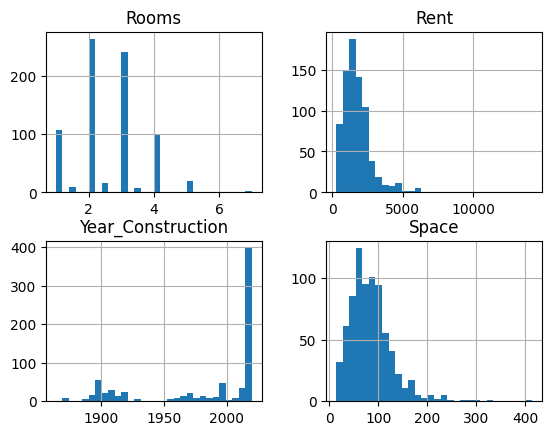

In [ ]:
#Answer
rentals.hist(bins=30);

In [ ]:
rentals[['Rooms', 'Rent', 'Year_Construction', 'Space']].agg(['mean', 'median', 'var', 'std']).round(2)

,Rooms,Rent,Year_Construction,Space
mean,2.55,1768.56,1983.70,84.66
median,2.50,1565.48,2015.00,77.60
var,1.02,1250514.29,2304.58,1953.23
std,1.01,1118.26,48.01,44.20


In [ ]:
rentals_no_outliners = rentals.query('Rent < 3000 & Year_Construction < 2008 & Space < 150')


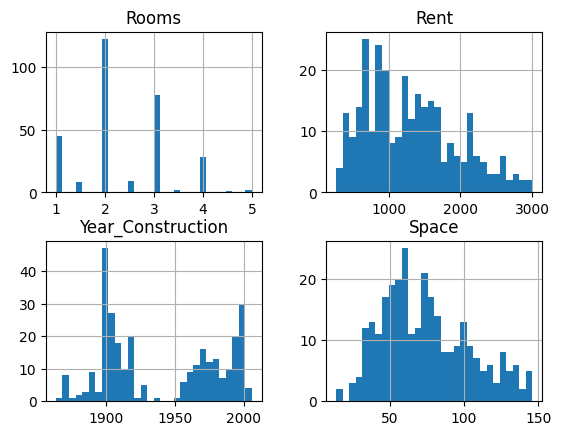

In [ ]:
rentals_no_outliners.hist(bins=30);

In [ ]:
rentals_no_outliners[['Rooms', 'Rent', 'Year_Construction', 'Space']].agg(['mean', 'median', 'var', 'std']).round(2)

,Rooms,Rent,Year_Construction,Space
mean,2.34,1307.07,1940.57,74.33
median,2.00,1246.00,1919.00,71.00
var,0.79,403714.19,1747.87,879.23
std,0.89,635.39,41.81,29.65


## **EXTRA MATERIAL**

**Using groupby with different functions for different columns**

The `.agg()` method also allows you to apply different functions to different columns. It's done by using a dictionary where the columns selected are the keys, and the functions you want to apply to each columns are the values. There is no need to select the columns before applying `.agg()` in this case, as the columns are selected inside the dictionary.

**Useful aggregation functions:**
- `mean()`
- `median()`
- `var()`
- `std()`
- `min()`
- `max()`
- `count()`
- `sum()`
- `nunique()`

**Bonus question #1:**

Revisit the `describe()` method from session #1. Study the output of the describe method, draw a simple barplot or any visual diagram for the dataset and check your understanding about the dataset.

In [ ]:
### Bonus question #1:
rentals.describe()
rentals.corr(numeric_only=True)

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


<Axes: xlabel='Rooms'>

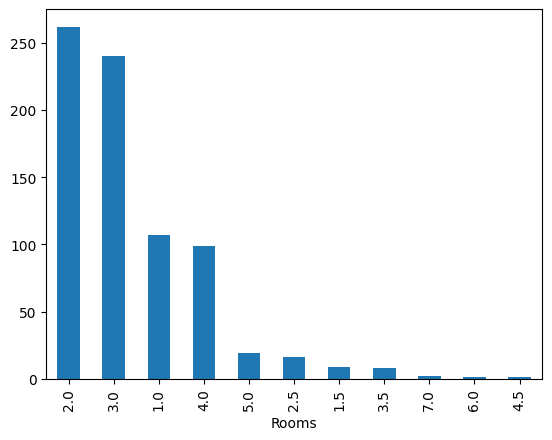

In [ ]:
rentals['Rooms'].value_counts().plot.bar()

**Bonus question #2:**

Below mentioned are the points for 2 teams who participated in a Premiere league football batch. When a team wins a match, they get **3** points, if they lose the match then they get **0** points and if the match is draw then they get **1** point.

Study the data and share your understanding, mainly

According to you, Which team has performed better, why?

Team A : { 3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0 }

Team B : { 3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3 }

In [ ]:
### Bonus question #2:
team_A = [3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0]
team_B = [3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3]
print("Team A =", st.mode(team_A))
print("Team B =", st.mode(team_B))
print("Team B is better")


Team A = 1
Team B = 3
Team B is better


**Bonus question #3:**

Based on the available cars data, Check whether the below hypothesis are valid.


1) If the doors are more, then the price of the car is high

2) If the price of the car is high, then the usage of the car is high ( Kms)


In [ ]:
from pickle import FALSE
### Bonus question #3:
#1)
cars.groupby('Doors')[['Price']].agg(['max', 'min', 'mean']).sort_values(("Price", "mean"), ascending=False).round(2)

Price                  
           max    min       mean
Doors                           
2.0    2350000  11000  438989.06
4.0    1725000   8000  426115.16
5.0    2800000   6300  314375.08
3.0     759000  10000  198505.45

In [ ]:
print('If the doors are more, then the price of the car is not high')

If the doors are more, then the price of the car is not high


In [ ]:
#2)
cars_c = cars[['Price','Kms']]

In [ ]:
cars_c.corr()

,Price,Kms
Price,1.000000,-0.159018
Kms,-0.159018,1.000000


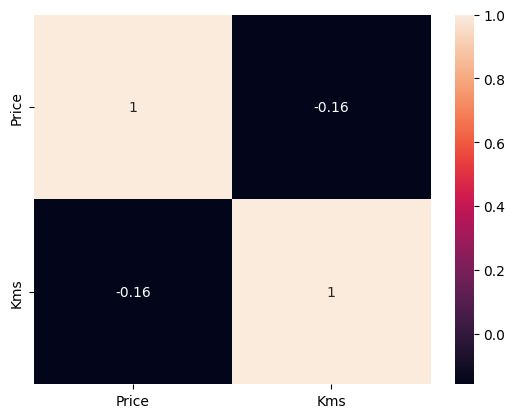

In [ ]:
sns.heatmap(cars_c.corr(),
            xticklabels=True,
            yticklabels=True,
            annot=True);

In [ ]:
print('The price of the car is no high, when the usage of the car is high ( Kms).')

The price of the car is no high, when the usage of the car is high ( Kms).
